# Lesson 11 activity solution

**Note**: we're not done yet! These plots fulfill the requirements, but in many cases we can do a lot better!

## Problem statement:
Analyze the housing dataset using various types of plots to gain insights into the data.

## Steps to perform:
1. Create a line plot to visualize the trend of house prices over the years.
2. Use a scatter plot to visualize the relationship between two numerical variables, such as __LotArea__ and __SalePrice__.
3. Create a bar chart to show the count of houses in each __Neighborhood__.
4. Use a box plot to visualize the distribution of __SalePrice__ in each __Neighborhood__.
5. Create a pie chart to visualize the proportion of houses that fall into each __MSZoning__ category.
6. Use a 3D scatter plot to visualize __LotArea__, __OverallQual__, and __SalePrice__ together.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset

In [2]:
df = pd.read_csv('housing_data.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Line plot: house price trends over time

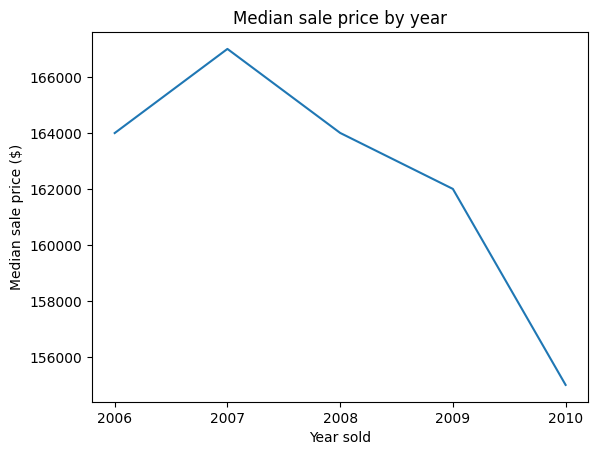

In [4]:
# Group by year and calculate median price
yearly_prices = df.groupby('YrSold')['SalePrice'].median().sort_index()

# Create line plot
plt.title('Median sale price by year')
plt.plot(yearly_prices.index.astype(str), yearly_prices.values)
plt.xlabel('Year sold')
plt.ylabel('Median sale price ($)')
plt.show()

## 2. Scatter plot: LotArea vs SalePrice

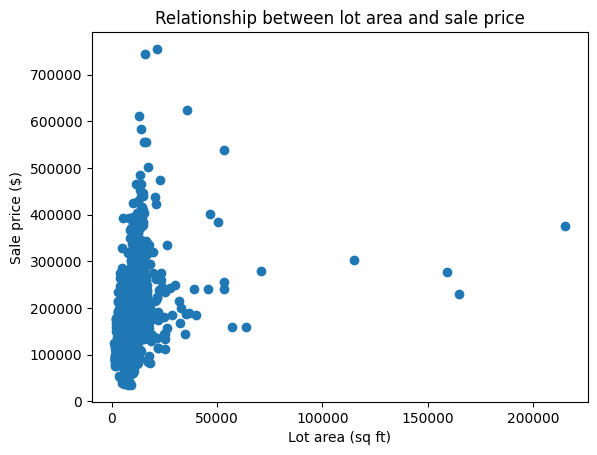

In [5]:
# Create scatter plot
plt.title('Relationship between lot area and sale price')
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('Lot area (sq ft)')
plt.ylabel('Sale price ($)')
plt.show()

## 3. Bar chart: house count by neighborhood

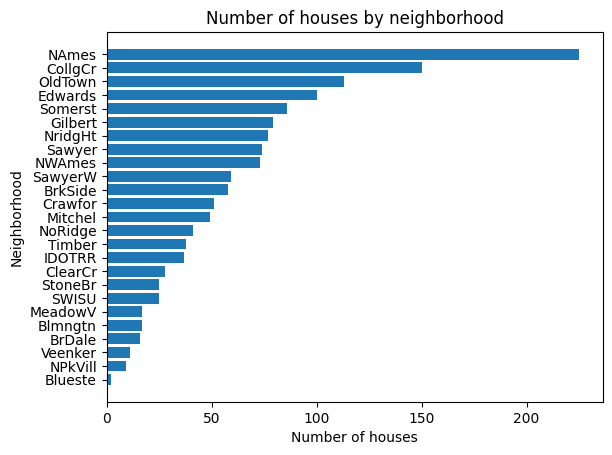

In [6]:
# Count houses by neighborhood
neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=True)

# Create bar chart
plt.title('Number of houses by neighborhood')
plt.barh(neighborhood_counts.index, neighborhood_counts.values)
plt.xlabel('Number of houses')
plt.ylabel('Neighborhood')
plt.show()

## 4. Box plot: SalePrice distribution by neighborhood

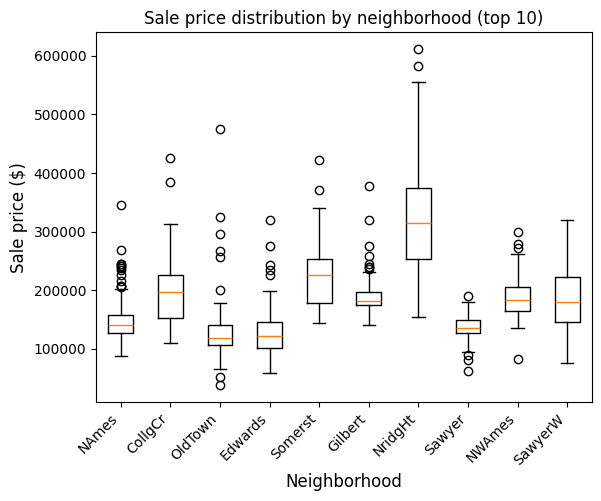

In [7]:
# Get top 10 neighborhoods by count for better visualization
top_neighborhoods = df['Neighborhood'].value_counts().head(10).index
df_top = df[df['Neighborhood'].isin(top_neighborhoods)]

# Prepare data for box plot
neighborhoods_list = []
prices_list = []

for neighborhood in top_neighborhoods:
    prices = df_top[df_top['Neighborhood'] == neighborhood]['SalePrice'].values
    neighborhoods_list.append(neighborhood)
    prices_list.append(prices)

# Create box plot
plt.title('Sale price distribution by neighborhood (top 10)')
plt.boxplot(prices_list, tick_labels=neighborhoods_list)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Sale price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Pie chart: proportion of houses by MSZoning

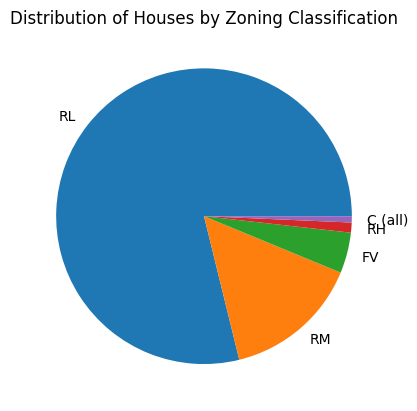

In [8]:
# Count houses by MSZoning
zoning_counts = df['MSZoning'].value_counts()

plt.title('Distribution of Houses by Zoning Classification')
plt.pie(zoning_counts.values, labels=zoning_counts.index)
plt.show()

## 6. 3D scatter plot: LotArea, OverallQual, and SalePrice

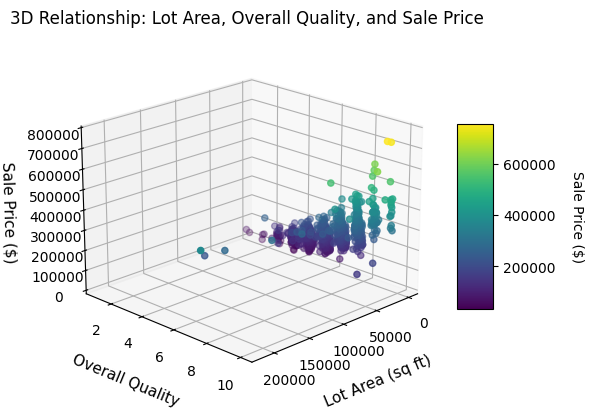

In [9]:
# Create 3D scatter plot
ax = plt.axes(projection='3d')

ax.set_title('3D Relationship: Lot Area, Overall Quality, and Sale Price')

# Create scatter plot with color based on SalePrice
scatter = ax.scatter(
    df['LotArea'], 
    df['OverallQual'], 
    df['SalePrice'],
    c=df['SalePrice'], 
    cmap='viridis'
)

# Add labels and title
ax.set_xlabel('Lot Area (sq ft)', fontsize=11, labelpad=10)
ax.set_ylabel('Overall Quality', fontsize=11, labelpad=10)
ax.set_zlabel('Sale Price ($)', fontsize=11, labelpad=10)

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Sale Price ($)', rotation=270, labelpad=20, fontsize=10)

# Adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.show()